<a href="https://colab.research.google.com/github/robsworld718/food-sales-predictions/blob/main/Copy_of_food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
filename = '/content/sales_predictions.csv'

In [3]:
df = pd.read_csv(filename)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
## How many rows: 8523
## How many colums: 12

In [5]:
df.shape

(8523, 12)

In [6]:
## MISSING VALUES in Item_Weight, Outlet_Size

In [7]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [8]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
df.duplicated().any()

False

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
## MISSING is a dataframe. 
missing = df.isnull()
num_missing = missing.sum()
num_missing

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
# df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].median())

In [14]:
## Missing 2 is a dataframe. 
missing2 = df.isnull()
num_missing2 = missing2.sum()
num_missing2

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [16]:
(num_missing / len(df)) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [17]:
#45values of our data is missing from 2 different collums
(num_missing / len(df)).sum()

0.4544174586413235

In [18]:
len(df)

8523

In [19]:
## LET's LOOK AT ITEM WEIGHT DISTRIBUTION

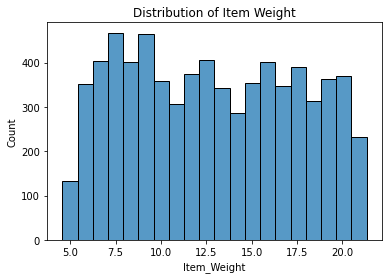

In [20]:
ax = sns.histplot(data=df, x='Item_Weight',bins='auto');
ax.set_title('Distribution of Item Weight');

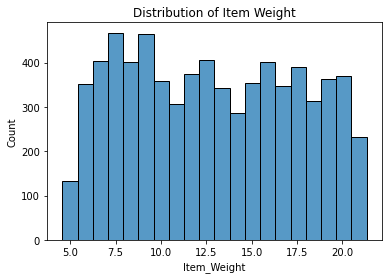

In [21]:
ax = sns.histplot(data=df, x='Item_Weight',bins='auto');
ax.set_title('Distribution of Item Weight');

In [22]:
df['Item_Weight'].isnull().sum()

1463

In [23]:
## LET's LOOK AT OUTLET SIZE

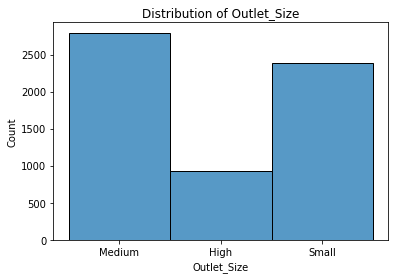

In [24]:
ax = sns.histplot(data=df, x='Outlet_Size');
ax.set_title('Distribution of Outlet_Size');

In [25]:
# COULD ALSO BE CORRECT CODE
df['Outlet_Size'].fillna('Medium', inplace=True)

In [26]:
df['Outlet_Size'].isnull().sum()

0

In [27]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [29]:
most_frequent = df['Outlet_Size'].mode()[0]
most_frequent

'Medium'

In [30]:
#All missing values from Item_Weight have been reaplaced with the mean of the column
#All missing values from Outlet_Size have been replaced with the mode the only central measure of tendacy with a non interger was mode
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [31]:
df["Item_Fat_Content"].replace({"LF": "Low Fat"}, inplace=True)
print(df.iloc[66])

Item_Identifier                          FDH19
Item_Weight                              19.35
Item_Fat_Content                       Low Fat
Item_Visibility                       0.033082
Item_Type                                 Meat
Item_MRP                              172.5738
Outlet_Identifier                       OUT035
Outlet_Establishment_Year                 2004
Outlet_Size                              Small
Outlet_Location_Type                    Tier 2
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                    4865.6664
Name: 66, dtype: object


In [32]:
df["Item_Fat_Content"].replace({"low fat": "Low Fat"}, inplace=True)

In [33]:
df["Item_Fat_Content"].replace({"reg": "Regular"}, inplace=True)

In [34]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [35]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [36]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [37]:
df[['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']].head().describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,5.000000,5.000000,5.000000,5.000000
mean,12.170000,0.010417,135.130560,1600.583200
std,5.822946,0.009585,85.948398,1347.489064
min,5.920000,0.000000,48.269200,443.422800
25%,8.930000,0.000000,53.861400,732.380000
50%,9.300000,0.016047,141.618000,994.705200
75%,17.500000,0.016760,182.095000,2097.270000
max,19.200000,0.019278,249.809200,3735.138000


In [38]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

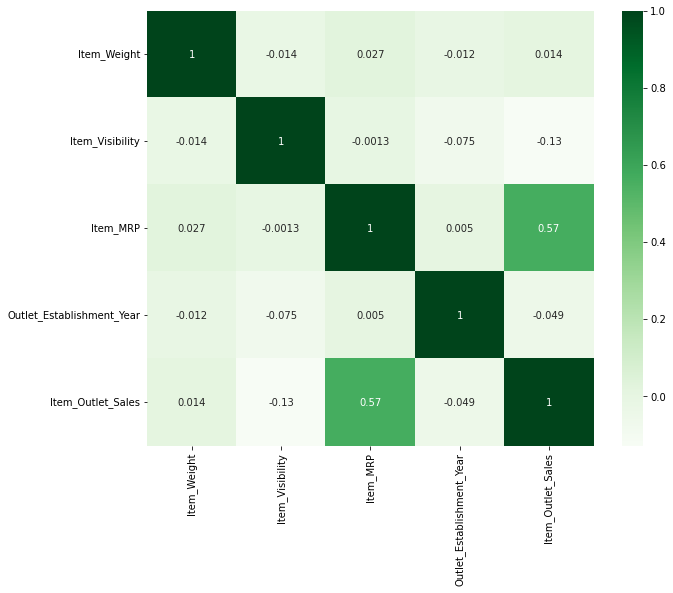

In [39]:
corr = df.corr()

import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap = 'Greens', annot = True)

In [40]:
df['Item_MRP'].sort_values().isnull().any()

False

In [41]:
df['Item_Outlet_Sales'].sort_values().isnull().any()

False

In [42]:
#There are 16 different types of food Items
df['Item_Type'].nunique()

16

In [43]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [44]:
df['Outlet_Establishment_Year'].value_counts().sort_index()

1985    1463
1987     932
1997     930
1998     555
1999     930
2002     929
2004     930
2007     926
2009     928
Name: Outlet_Establishment_Year, dtype: int64

In [45]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [46]:
# NEITHER OF THESE ARE REALLY FILTERS
Materials_filter = df['Item_MRP'].value_counts()
Materials_filter

172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64

In [47]:
df['Item_MRP'].value_counts()

172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64

In [48]:
df['Item_Outlet_Sales'].value_counts()

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [49]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Let's visualize the distributions for individual columns (single variate)

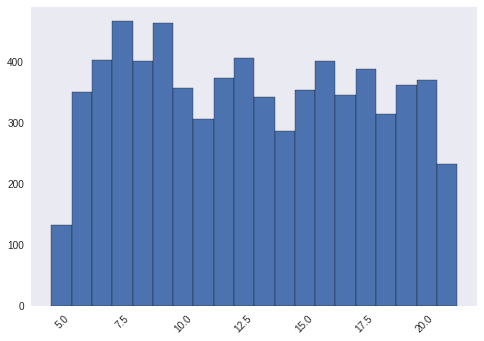

In [50]:
plt.style.use('seaborn')
MRP_filter = df.loc[:, 'Item_Weight'] <= 25
df.loc[MRP_filter, 'Item_Weight'].hist(bins = 'auto',
                                   edgecolor='black')
plt.grid()
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
#The Item wholesale column has a bimodal distribution

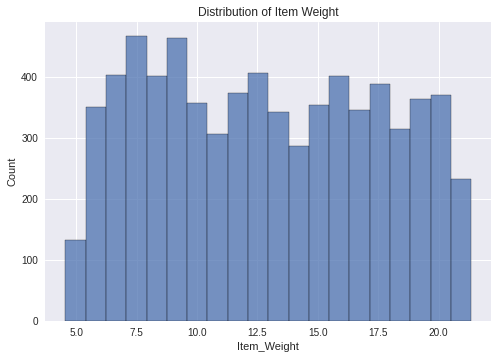

In [51]:
# SIMPLIFIED CODE
ax = sns.histplot(data=df, x='Item_Weight',bins='auto');
ax.set_title('Distribution of Item Weight');

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

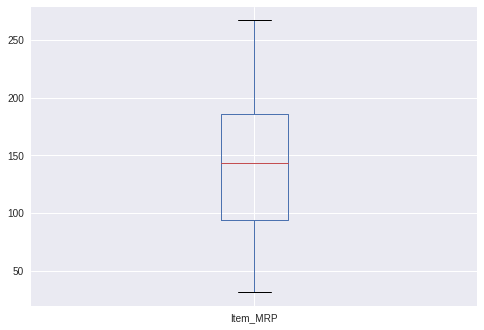

In [52]:
df.boxplot(column = 'Item_MRP');
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

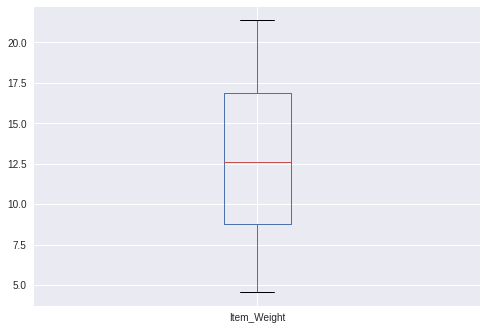

In [53]:
df.boxplot(column = 'Item_Weight');
df['Item_Weight'].describe()

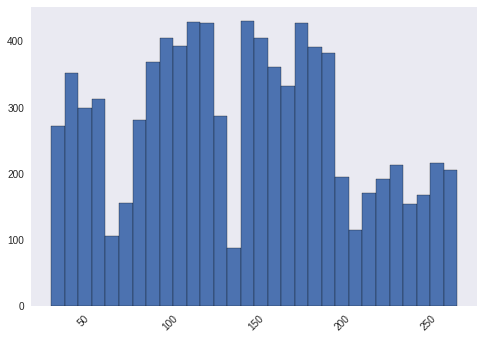

In [54]:
plt.style.use('seaborn')
MRP_filter = df.loc[:, 'Item_MRP'] <= 300
df.loc[MRP_filter, 'Item_MRP'].hist(bins = 30,
                                   edgecolor='black')
plt.grid()
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
#The Item wholesale column has a bimodal distribution

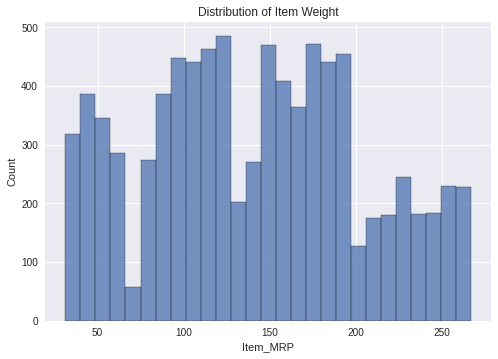

In [55]:
ax = sns.histplot(data=df, x='Item_MRP', bins='auto');
ax.set_title('Distribution of Item Weight');

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

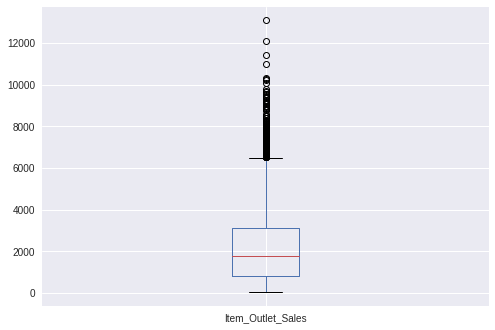

In [56]:
df.boxplot(column = 'Item_Outlet_Sales');
df['Item_Outlet_Sales'].describe()

In [57]:
from itertools import groupby
item_type_group = df.sort_values(by=('Item_MRP'), ascending=False).groupby('Item_Type')
item_type_group

Visualizations (Multi-variate)

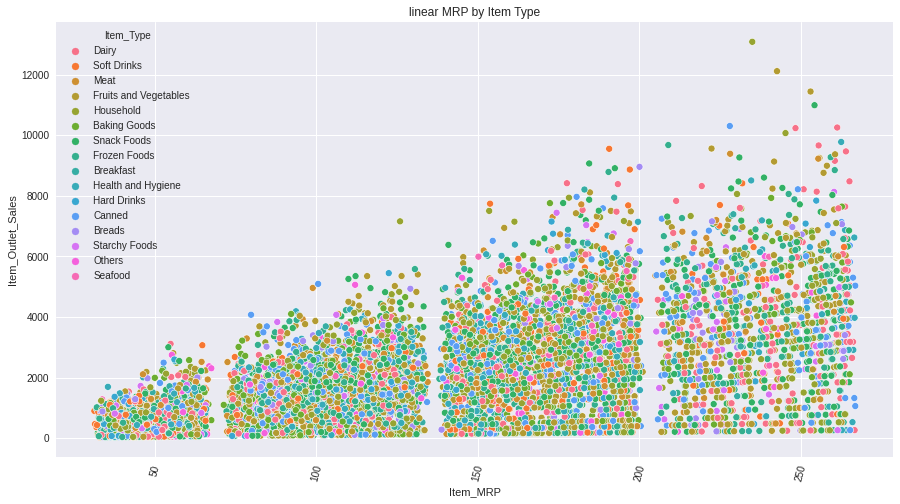

In [58]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=75)
plt.title('linear MRP by Item Type')
ax = sns.scatterplot(x="Item_MRP", y="Item_Outlet_Sales", hue=df["Item_Type"], data=df)
## This scatterplot was constructed based on the highest correlation in our heatmap. However it really doesn't tell me much about the relation between the highest corellated columns

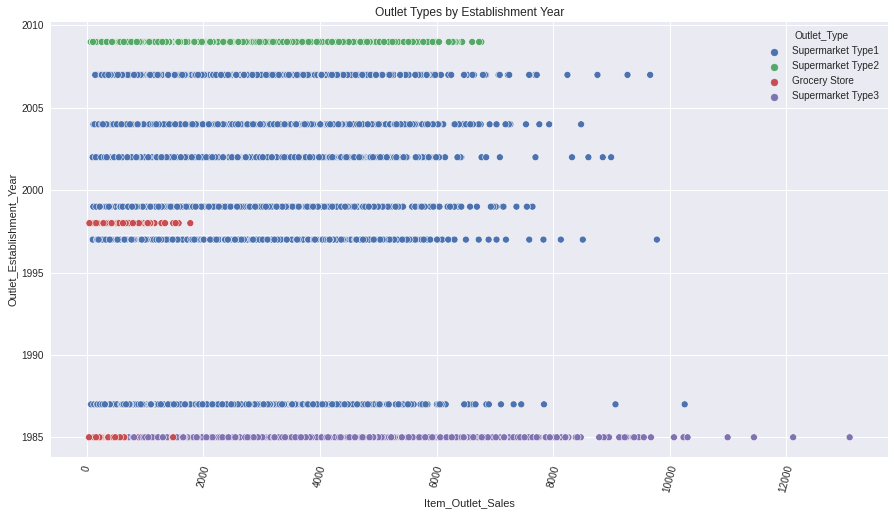

In [59]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=75)
plt.title('Outlet Types by Establishment Year')
ax = sns.scatterplot(x="Item_Outlet_Sales", y="Outlet_Establishment_Year", hue=df["Outlet_Type"], data=df)
plt.savefig('OTBEY.png', dpi = 300)
## This graph displays Oulet Sales by establishment year with Supermarket Type3 having the high sale performance.

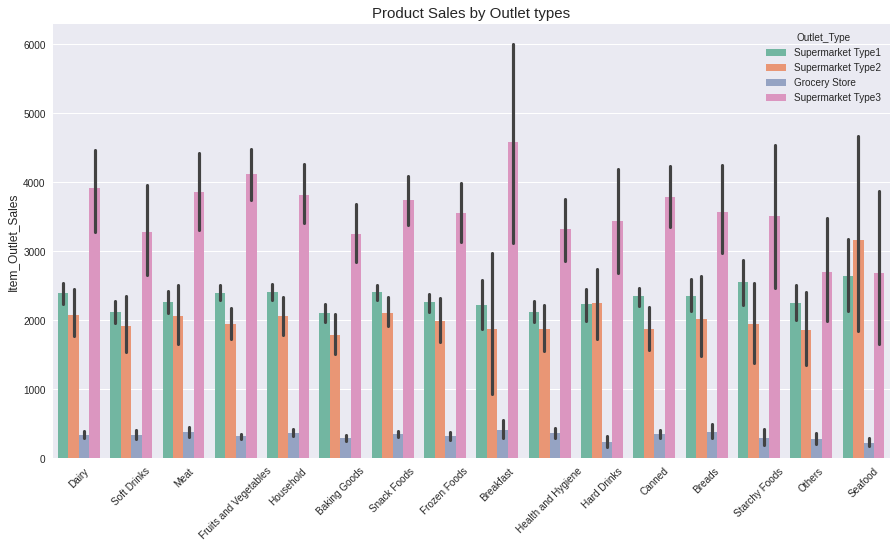

In [60]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
ax2 = sns.barplot(x='Item_Type', y='Item_Outlet_Sales', hue=df["Outlet_Type"], data=df, palette="Set2")
ax2.set_title("Product Sales by Outlet types", fontsize=15)
ax2.set_xlabel("", fontsize=12)
ax2.set_ylabel("Item_Outlet_Sales", fontsize=12)
ax2.get_xticklabels()
plt.savefig('PSBOT.png')
## For each product grocery stores have the lowest outlet sales among any Outlet type out of any product.

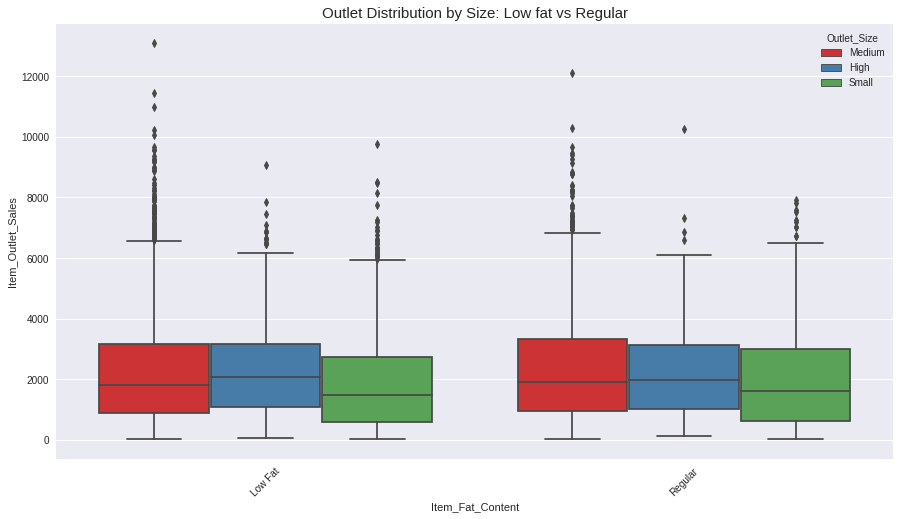

In [61]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
plt.title('Outlet Distribution by Size: Low fat vs Regular', fontsize=15)
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', hue="Outlet_Size", data=df, palette="Set1")
plt.savefig('ODBSLVR.png')
## The distributions for both are nearly symetrical for the 25th, median and 75th quartiles. However small size outlets have higher maximums for small sized Regular outlets in regards to sales for fat content compared to small sized Low Fat outlets

Now Lets split the data into X for features and y for our target using the SciKitlearn library

In [62]:
from sklearn import set_config
set_config(display='diagram')
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [63]:
X = df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier'])
y = df['Item_Outlet_Sales']

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [65]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

scaler = StandardScaler()
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy = 'mean')
freq_imputer = SimpleImputer(strategy = 'most_frequent')

num_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, ohe_encoder)

num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

In [66]:
num_columns = num_selector(X_train)
cat_columns = cat_selector(X_train)

In [67]:
num_selector(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [68]:
cat_selector(X_train)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [69]:
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')

In [70]:
X_train_processed = col_transformer.fit(X_train)

In [71]:
col_transformer.named_transformers_

{'pipeline-1': Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 'pipeline-2': Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse=False))])}

In [72]:
col_transformer.named_transformers_['pipeline-2']

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

###Extract the feature names from one hot encoder

In [73]:
cat_feature_names = col_transformer.named_transformers_['pipeline-2']\
                          .named_steps['onehotencoder']\
                          .get_feature_names_out(cat_selector(X_train))

cat_feature_names

array(['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Typ

###Got final col names which are num features + cat feature

In [74]:
final_cols = num_selector(X_train) + list(cat_feature_names)
final_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Fat_Content_Low Fat',
 'Item_Fat_Content_Regular',
 'Item_Type_Baking Goods',
 'Item_Type_Breads',
 'Item_Type_Breakfast',
 'Item_Type_Canned',
 'Item_Type_Dairy',
 'Item_Type_Frozen Foods',
 'Item_Type_Fruits and Vegetables',
 'Item_Type_Hard Drinks',
 'Item_Type_Health and Hygiene',
 'Item_Type_Household',
 'Item_Type_Meat',
 'Item_Type_Others',
 'Item_Type_Seafood',
 'Item_Type_Snack Foods',
 'Item_Type_Soft Drinks',
 'Item_Type_Starchy Foods',
 'Outlet_Identifier_OUT010',
 'Outlet_Identifier_OUT013',
 'Outlet_Identifier_OUT017',
 'Outlet_Identifier_OUT018',
 'Outlet_Identifier_OUT019',
 'Outlet_Identifier_OUT027',
 'Outlet_Identifier_OUT035',
 'Outlet_Identifier_OUT045',
 'Outlet_Identifier_OUT046',
 'Outlet_Identifier_OUT049',
 'Outlet_Size_High',
 'Outlet_Size_Medium',
 'Outlet_Size_Small',
 'Outlet_Location_Type_Tier 1',
 'Outlet_Location_Type_Tier 2',
 'Outlet_Location_Type_Tier 3',
 'Outlet_T

Transform the X_train and the X_test

In [75]:
X_train_transformed = col_transformer.transform(X_train)

X_test_transformed = col_transformer.transform(X_test)

Converted the X_train and X_test transformed columns to a dataframe

In [76]:
X_train_output = pd.DataFrame(X_train_transformed, columns = final_cols)

X_test_output = pd.DataFrame(X_test_transformed, columns = final_cols)

In [77]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

Made a pipeline to connect everything I created to the linear Regression model through pipe fitting

In [78]:
pipe = make_pipeline(col_transformer, reg)


The Column transformer and the Linear regression model is ONLY fit to the training data to ensure no data is leaked

In [79]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2c6b2ac3d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2c6b2acd10>)])),
                ('linearregression', LinearRegression())])

Now we can score our pipes just as we would score a model on the testing and training data without fear of data leakage

In [80]:
pipe.score(X_train, y_train)

0.5615550749122269

In [81]:
pipe.score(X_test, y_test)

0.5671055563179823

Function created to evaluate regression metrics (mean squared error, mean absolute error, root squared error, and root mean squared error)

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_true, y_pred):
  """takes two arrays, true labels and predicted labels, and prints
  MAE, MSE, RMSE, and R2 metrics"""
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  rmse = np.sqrt(mse)
  print(f'MAE {mae}\n MSE {mse}\n R^2 {r2}\n RMSE {rmse}')

# Linear Regression Evaluation (Scored low)

In [83]:
evaluate_model(y_train, pipe.predict(X_train))

MAE 847.1287326345432
 MSE 1297558.3346717297
 R^2 0.5615550749122269
 RMSE 1139.1041807805507


# Decision Tree Model

In [84]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state = 42)

In [85]:
pipe2 = make_pipeline(col_transformer, dec_tree)

In [86]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2c6b2ac3d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2c6b2acd10>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [87]:
train_preds = pipe2.predict(X_train)
test_preds = pipe2.predict(X_test)

In [88]:
train_score = pipe2.score(X_train, y_train)
test_score = pipe2.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.18409072273251326


In [89]:
dec_tree.get_depth()

40

In [90]:
dec_tree.get_n_leaves()

6271

In [91]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2c6b2ac3d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2c6b2acd10>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [92]:
pipe2.score(X_train, y_train)

1.0

In [93]:
pipe2.score(X_test, y_test)

0.18409072273251326

In [94]:
max_depth_range = list(range(5, 20)) 
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    pipe3 = make_pipeline(col_transformer, dec_tree)
    pipe3.fit(X_train, y_train)
    score = pipe3.score(X_test, y_test)
    r2.append(score)

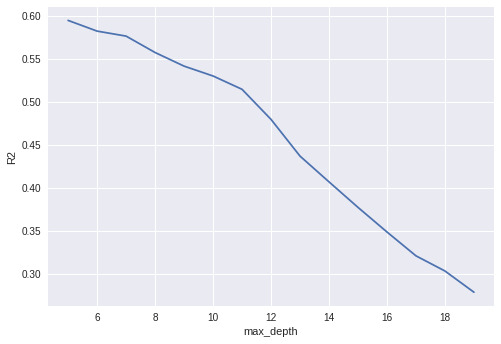

In [95]:
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [96]:
evaluate_model(y_train, pipe3.predict(X_train))

MAE 218.19225397721672
 MSE 245947.14518762365
 R^2 0.9168944665022553
 RMSE 495.930585049585


Decision Tree Parameter tuning

In [97]:
max_depth_range_2 = list(range(5, 20)) 
r2 = []
for depth in max_depth_range:
    dec_tree_5 = DecisionTreeRegressor(max_depth = 5, 
                                       random_state = 42)
    pipe4 = make_pipeline(col_transformer, dec_tree_5)
    pipe4.fit(X_train, y_train)
    score = pipe4.score(X_test, y_test)
    r2.append(score)

In [98]:
train_5_score = pipe4.score(X_train, y_train)
test_5_score = pipe4.score(X_test, y_test)
print(train_5_score)
print(test_5_score)

0.6039397477322956
0.5947099753159972
